In [1]:
import os
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial
import pickle
import sklearn.metrics as sklm

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-01-02 12:35:19,785 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
subject = '52-001'

In [3]:
scoring_weights = {'orientation': 100.0,
                   'major_axis_length': 1,
                   'minor_axis_length': 1}
model_params = {'loc_od': (15.5, 1.5),
                'sampling': 200,
                'csmode': 'gaussian',
                'sensitivity_rule': 'decay',
                'scoring_weights': scoring_weights}

In [4]:
fitted_params = {
    '12-005': {
        'decay_const': 8.22714728e-01,
        'cswidth': 9.81548876e+01,
        'implant_x': 8.52345697e+02,
        'implant_y': -4.29498612e+02,
        'implant_rot': 7.58609867e-01,
        'thresh': 1.00007292e-01
    },
    '51-009': {
        'decay_const': 3.163607,
        'cswidth': 50.,
        'implant_x': -418.00714076,
        'implant_y': -100.71325617,
        'implant_rot': 0.78539816,
        'thresh': 0.81590648
    },
    '52-001': {
        'decay_const': 2.69042358e+00,
        'cswidth': 3.28809215e+02,
        'implant_x': 2.51584586e+02,
        'implant_y': -5.00000000e+02,
        'implant_rot': 7.85398163e-01,
        'thresh': 4.58102184e-01
    }
}

In [5]:
for key, value in fitted_params[subject].items():
    model_params[key] = value

In [6]:
rootfolder = os.path.join(os.environ['SECOND_SIGHT_DATA'], 'shape')
electrodes = None
X, y = p2pspatial.load_data(rootfolder, subject=subject, electrodes=electrodes,
                            single_stim=True, verbose=False)
print(X.shape, y.shape)
X, y = p2pspatial.transform_data(X, y)
print(X.shape, y.shape)

(698, 10) (698, 4)
(60, 10) (60, 4)


In [7]:
regressor = p2pspatial.SpatialModelRegressor()
regressor.fit(X, **model_params)

implant (x, y): (251.58, -500.00), rot: 0.785398
Set loc_od: (15.5, 1.5) decay_const: 2.69042358 sensitivity_rule: decay thresh: 0.458102184
Calculating effective current for electrodes: ['A01' 'A05' 'A07' 'A08' 'A10' 'B06' 'B07' 'B09' 'C04' 'C08' 'C10' 'D03'
 'D05' 'D07' 'D08' 'E01' 'E03' 'E04' 'E05' 'E06' 'E09' 'E10' 'F01' 'F02'
 'F04' 'F06' 'F07' 'F08' 'F09' 'F10']
Done.


SpatialModelRegressor()

In [8]:
y_pred = pd.DataFrame(regressor.predict(X))

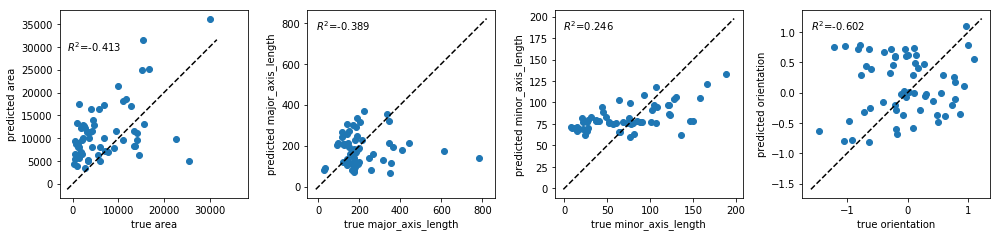

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(y.columns), figsize=(14, 6))
for ax, name in zip(axes.ravel(), y.columns):
    r2str = '$R^2$=%.3f' % sklm.r2_score(y.loc[:, name], y_pred.loc[:, name])
    ax.plot(y.loc[:, name], y_pred.loc[:, name], 'o')
    lims = ax.axis()
    ax.plot([lims[0], lims[1]], [lims[0], lims[1]], 'k--')
    ax.text(lims[0], lims[1], r2str, va='top')
    ax.set_xlabel('true ' + name)
    ax.set_ylabel('predicted ' + name)
    ax.axis('square')
fig.tight_layout()

In [10]:
X

,electrode,amp,param_str,folder,filename,img_shape,date,centroid,stim_class,subject
0,A01,1.50,52-001_CDL0.35_t6_f60_pw46_20100712.csv A05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial1.bmp,"(768, 1024)",20100812,"(388.547660312, 194.706239168)",CDL0.35,52-001
1,A01,2.00,52-001_CDL0.35_t6_f60_pw46_20100712.csv A05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial8.bmp,"(768, 1024)",20100812,"(329.729496403, 448.063489209)",CDL0.35,52-001
2,A05,1.25,52-001_CDL0.35_t6_f60_pw46_20100712.csv A05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial11.bmp,"(768, 1024)",20100812,"(278.6326563, 488.871786734)",CDL0.35,52-001
3,A05,2.00,52-001_CDL0.35_t6_f60_pw46_20100712.csv A05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial16.bmp,"(768, 1024)",20100812,"(298.125360012, 504.165832954)",CDL0.35,52-001
4,A05,3.00,52-001_CDL0.35_t6_f60_pw46_20100712.csv A05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial20.bmp,"(768, 1024)",20100812,"(307.734844751, 466.72465911)",CDL0.35,52-001
5,A05,5.00,52-001_CDL0.35_t6_f60_pw46_20100712.csv E05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial2.bmp,"(768, 1024)",20100812,"(565.312783661, 357.683055976)",CDL0.35,52-001
6,A05,7.50,52-001_CDL0.35_t6_f60_pw46_20100712.csv E05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial7.bmp,"(768, 1024)",20100812,"(541.657420646, 452.977981127)",CDL0.35,52-001
7,A07,2.00,52-001_CDL0.35_t6_f60_pw46_20100712.csv E05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial12.bmp,"(768, 1024)",20100812,"(535.661366921, 530.598595912)",CDL0.35,52-001
8,A08,1.50,52-001_CDL0.35_t6_f60_pw46_20100712.csv E05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial15.bmp,"(768, 1024)",20100812,"(499.286802514, 554.645400876)",CDL0.35,52-001
9,A08,2.00,52-001_CDL0.35_t6_f60_pw46_20100712.csv E05 30...,/home/mbeyeler/data/secondsight/shape/52-001/2...,20100812_100910_trial18.bmp,"(768, 1024)",20100812,"(566.754828538, 546.749507292)",CDL0.35,52-001


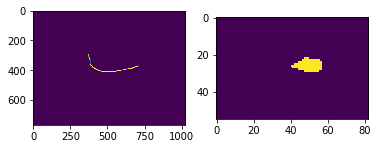

In [22]:
idx = 11

plt.subplot(121)
plt.imshow(p2pspatial.get_avg_image(X, subject, X.loc[idx, 'electrode'], amp=X.loc[idx, 'amp']))

plt.subplot(122)
img = regressor.predict_image(X.loc[idx:idx + 1, :])[0]
plt.imshow(p2pspatial.get_thresholded_image(img, thresh=regressor.model_params['thresh']))

In [ ]:
np.isclose(1.25, np.unique(X['amp']))

In [ ]:
np.isclose(1.25, X['amp'])